In [54]:
import ROOT
import math
import uproot
import numpy as np
import mplhep as hep
import matplotlib as mpl
import matplotlib.pyplot as plt

hep.style.use(hep.style.CMS)

In [60]:
fileptr   = uproot.open('Systematics_AllVars_2D_100PE_MCStatFixed.root')
nbinsrhoi = 24
nvars     = 38

In [61]:
fileptr.keys()

['hpowhegAllVar;2',
 'hpowhegAllVar;1',
 'TotalStatCovMatrix_AllVar_rebinnedA;2',
 'TotalStatCovMatrix_AllVar_rebinnedA;1',
 'TotalSystCovMatrix_AllVar_rebinnedA;2',
 'TotalSystCovMatrix_AllVar_rebinnedA;1',
 'TotalStatCovMatrix_AllVarNorm_rebinnedA;2',
 'TotalStatCovMatrix_AllVarNorm_rebinnedA;1',
 'TotalSystCovMatrix_AllVarNorm_rebinnedA;2',
 'TotalSystCovMatrix_AllVarNorm_rebinnedA;1']

In [62]:
var_dict = {
'b1k' : r'$B_{1}^{k}$',
'b2k' : r'$B_{2}^{k}$',
'b1r' : r'$B_{1}^{r}$',
'b2r' : r'$B_{2}^{r}$',
'b1n' : r'$B_{1}^{n}$',
'b2n' : r'$B_{2}^{n}$',
'b1j' : r'$B_{1}^{k^{*}}$',
'b2j' : r'$B_{2}^{k^{*}}$',
'b1q' : r'$B_{1}^{r^{*}}$',
'b2q' : r'$B_{2}^{r^{*}}$',
'c_kk': r'$C_{kk}$',
'c_rr': r'$C_{rr}$',
'c_nn' : r'$C_{nn}$',
'c_Prk' : r'$C_{Prk}$',
'c_Mrk' : r'$C_{Mrk}$',
'c_Pnr' : r'$C_{Pnr}$',
'c_Mnr' : r'$C_{Mnr}$',
'c_Pnk' : r'$C_{Pnk}$',
'c_Mnk' : r'$C_{Mnk}$',
'c_kj'  : r'$C_{kj}$',
'c_rq'  : r'$C_{rq}$',
'c_han' : r'$C_{han}$',
'c_tra' : r'$C_{tra}$',
'c_sca' : r'$C_{sca}$',
'c_Prj' : r'$C_{Prj}$',
'c_Mrj' : r'$C_{Mrj}$',
'c_kjL' : r'$C_{kjL}$',
'c_rqL' : r'$C_{rqL}$',
'c_rkP' : r'$C_{rkP}$',
'c_rkM' : r'$C_{rkM}$',
'c_nrP' : r'$C_{nrP}$',
'c_nrM' : r'$C_{nrM}$',
'c_nkP' : r'$C_{nkP}$',
'c_nkM' : r'$C_{nkM}$',
'll_cHel' : r'$\cos \varphi$',
'll_cLab' : r'$\cos \varphi_{lab}$',
'llbar_delta_phi' : r'$\Delta \phi_{\ell \bar{\ell}}$',
'llbar_delta_eta' : r'$\Delta \eta_{\ell \bar{\ell}}$',
}

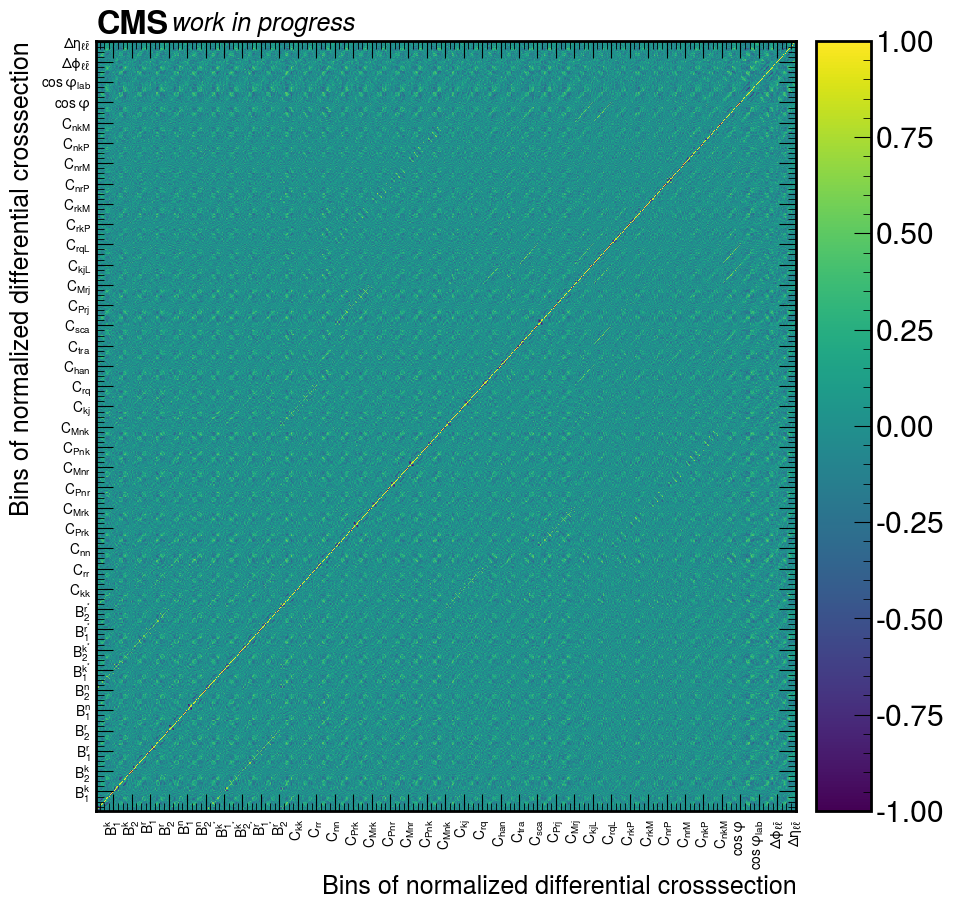

In [9]:
plt.figure(figsize=(10, 10))

hep.hist2dplot(np.loadtxt('RhoBBCorrected_rebinnedA.txt'), vmin=-1, vmax=1)
plt.ylabel('Bins of normalized differential crosssection', fontsize=18)
plt.xlabel('Bins of normalized differential crosssection', fontsize=18)

plt.xticks([nbinsrhoi*i - 1 for i in range(1,39)], var_dict.values(), rotation=90, fontsize=10)
plt.yticks([nbinsrhoi*i - 1 for i in range(1,39)], var_dict.values(), rotation=0, fontsize=10)

hep.cms.text('work in progress', fontsize=18)
plt.savefig('Statistical_correlation_matrix_2D.pdf', bbox_inches='tight')

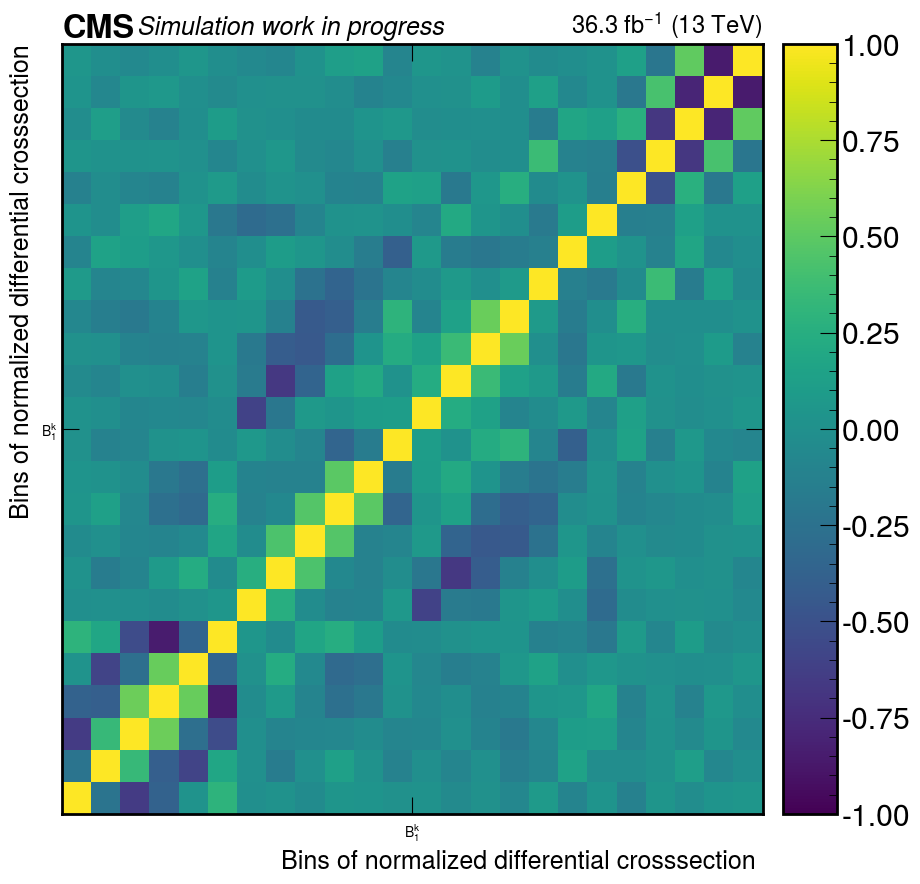

In [17]:
CovMat2D = np.loadtxt('RhoBBCorrected_rebinnedA.txt')
hep.hist2dplot(CovMat2D[:24, :24], vmin=-1, vmax=1)
plt.ylabel('Bins of normalized differential crosssection', fontsize=18)
plt.xlabel('Bins of normalized differential crosssection ', fontsize=18)

plt.xticks([12], [r'$B_{1}^{k}$'], rotation=0, fontsize=10)
plt.yticks([12], [r'$B_{1}^{k}$'], rotation=0, fontsize=10)

hep.cms.label('work in progress', lumi=36.3, fontsize=18)
plt.savefig('Statistical_correlation_matrix_b1k_2D.pdf', bbox_inches='tight')

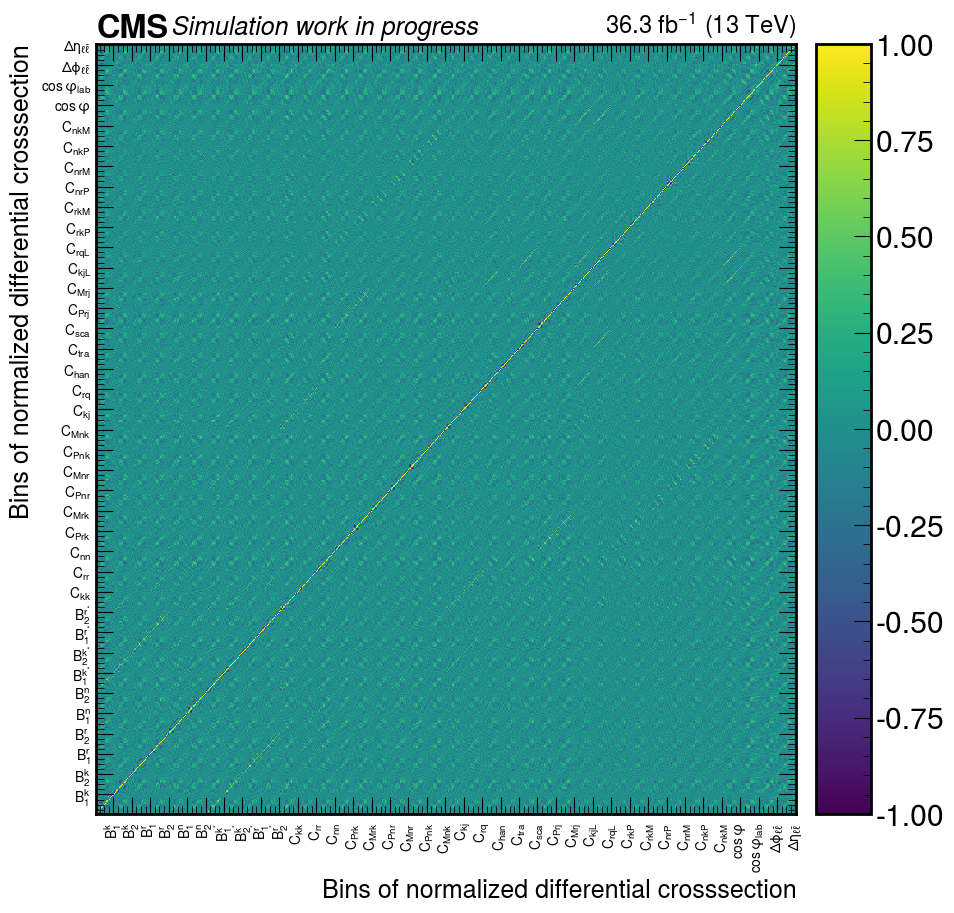

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


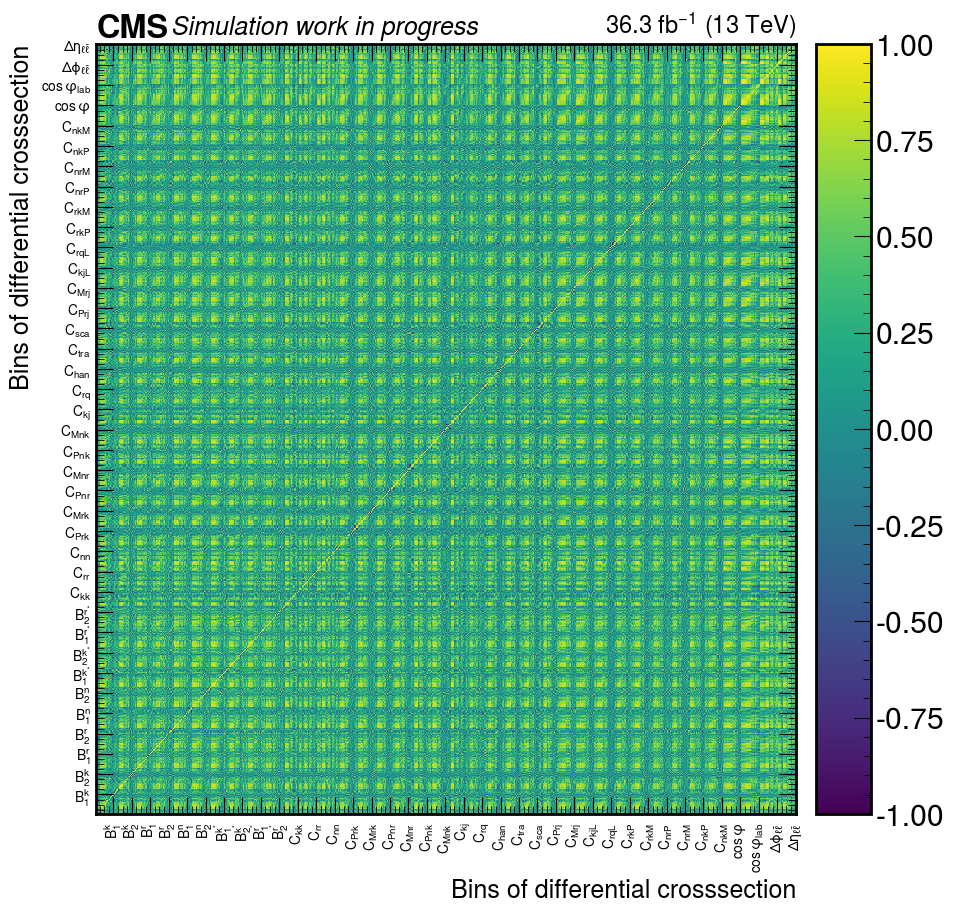

In [63]:
modes = ['Stat', 'Syst']
norms = [True, False]

for mode in modes :
    for norm in norms :
        
        if   mode == 'Stat' and norm :
            CovMatrix  = fileptr['TotalStatCovMatrix_AllVarNorm_rebinnedA'].to_numpy()[0]
            
        elif mode == 'Syst' and norm:
            CovMatrix  = fileptr['TotalSystCovMatrix_AllVarNorm_rebinnedA'].to_numpy()[0]
            
        elif mode == 'Stat' and not norm:
            CovMatrix  = fileptr['TotalStatCovMatrix_AllVar_rebinnedA'].to_numpy()[0]
            
        else :
            CovMatrix  = fileptr['TotalSystCovMatrix_AllVar_rebinnedA'].to_numpy()[0]
            
        CorrMatrix = np.zeros((nbinsrhoi * nvars, nbinsrhoi * nvars)) 

        for i in range(len(CovMatrix)) :
            for j in range(len(CovMatrix)) :
                CorrMatrix[i][j] = CovMatrix[i][j]/ math.sqrt(CovMatrix[i][i]* CovMatrix[j][j])
                
        # New figure
        plt.figure(figsize=(10, 10))
        hep.hist2dplot(CorrMatrix, vmin=-1, vmax=1)

        # For normalized
        if norm :
            plt.ylabel('Bins of normalized differential crosssection', fontsize=18)
            plt.xlabel('Bins of normalized differential crosssection', fontsize=18)

        # For absolute
        else :
            plt.ylabel('Bins of differential crosssection', fontsize=18)
            plt.xlabel('Bins of differential crosssection', fontsize=18)
            
        plt.xticks([nbinsrhoi*i - 1 for i in range(1,39)], var_dict.values(), rotation=90, fontsize=10)
        plt.yticks([nbinsrhoi*i - 1 for i in range(1,39)], var_dict.values(), rotation=0, fontsize=10)

        hep.cms.label('work in progress', lumi=36.3, fontsize=18)
        
        if   mode == 'Stat' and norm :
            plt.savefig('Statistical_correlation_matrix_normalized_2D.pdf', bbox_inches='tight')
            
        elif mode == 'Syst' and norm:
            plt.savefig('Systematic_correlation_matrix_normalized_2D.pdf', bbox_inches='tight')
            
        elif mode == 'Stat' and not norm:
            plt.savefig('Statistical_correlation_matrix_absolute_2D.pdf' , bbox_inches='tight')
            
        else :
            plt.savefig('Systematic_correlation_matrix_absolute_2D.pdf' , bbox_inches='tight')     

(exptext: Custom Text(0.001, 1, 'CMS'),
 expsuffix: Custom Text(0.001, 1.005, 'work in progress'))

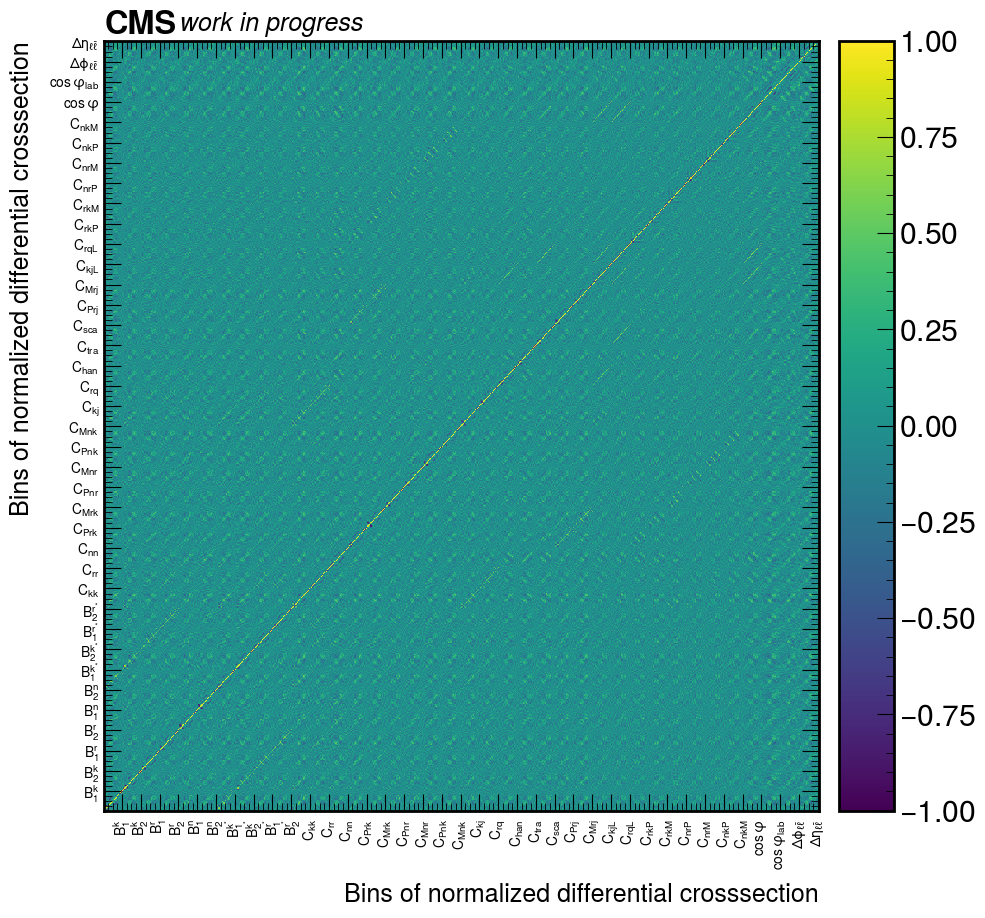

In [156]:
plt.figure(figsize=(10, 10))

hep.hist2dplot(CorrMatrix, vmin=-1, vmax=1)

# For absolute
# plt.ylabel('Bins of differential crosssection', fontsize=18)
# plt.xlabel('Bins of differential crosssection', fontsize=18)

# For normalized
plt.ylabel('Bins of normalized differential crosssection', fontsize=18)
plt.xlabel('Bins of normalized differential crosssection', fontsize=18)

plt.xticks([nbinsrhoi*i - 1 for i in range(1,39)], var_dict.values(), rotation=90, fontsize=10)
plt.yticks([nbinsrhoi*i - 1 for i in range(1,39)], var_dict.values(), rotation=0, fontsize=10)

hep.cms.text('work in progress', fontsize=18)

# plt.savefig('Statistical_correlation_matrix_normalized_2D.pdf', bbox_inches='tight')
# plt.savefig('Statistical_correlation_matrix_normalized_2D.pdf', bbox_inches='tight')

In [52]:
fileptr1D = uproot.open('Systematics_AllVars_1D_1000PE_MCStatFixed.root')
nbinsrhoi = 6
nvars     = 38

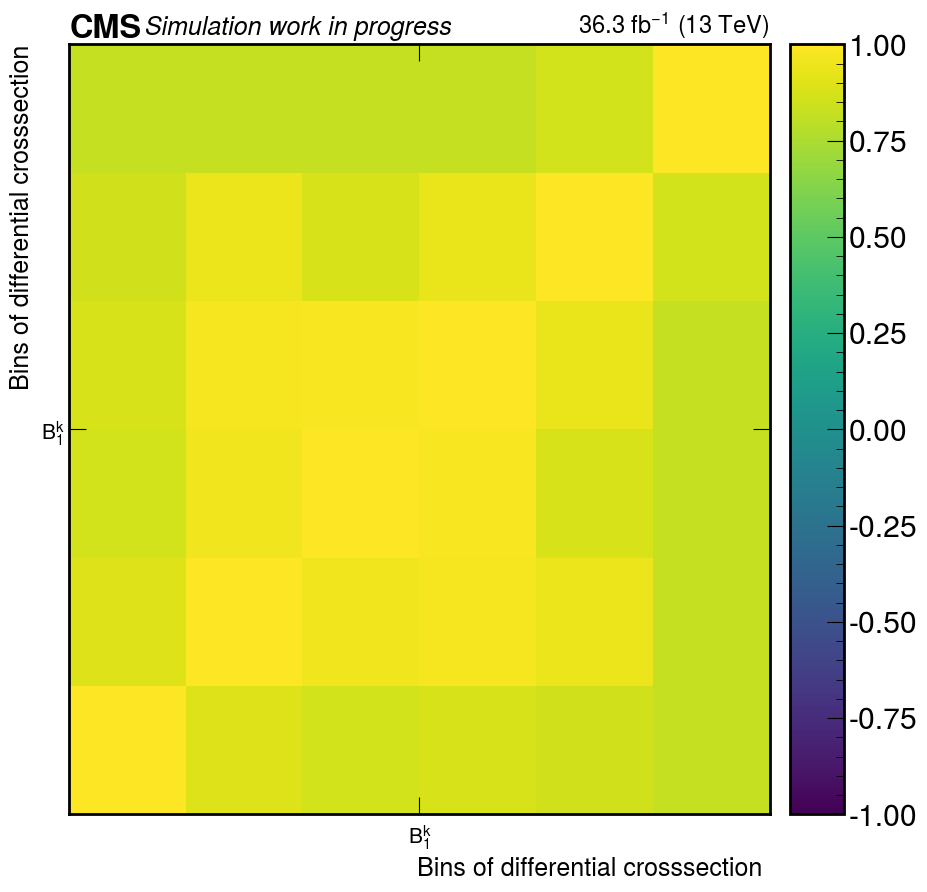

In [53]:
CovMatrix  = fileptr1D['TotalSystCovMatrix_AllVar_rebinnedA'].to_numpy()[0]

CorrMatrix = np.zeros((nbinsrhoi * nvars, nbinsrhoi * nvars)) 

for i in range(len(CovMatrix)) :
    for j in range(len(CovMatrix)) :
        CorrMatrix[i][j] = CovMatrix[i][j]/ math.sqrt(CovMatrix[i][i]* CovMatrix[j][j])
                
hep.hist2dplot(CorrMatrix[:nbinsrhoi, :nbinsrhoi], vmin=-1, vmax=1)
plt.ylabel('Bins of differential crosssection', fontsize=18)
plt.xlabel('Bins of differential crosssection ', fontsize=18)

plt.xticks([nbinsrhoi//2], [r'$B_{1}^{k}$'], rotation=0, fontsize=15)
plt.yticks([nbinsrhoi//2], [r'$B_{1}^{k}$'], rotation=0, fontsize=15)

hep.cms.label('work in progress', lumi=36.3, fontsize=18)
plt.savefig('Systematic_correlation_matrix_b1k_1D.pdf', bbox_inches='tight')

In [50]:
fileptr2D = uproot.open('Systematics_AllVars_2D_100PE_MCStatFixed.root')
nbinsrhoi = 24
nvars     = 38

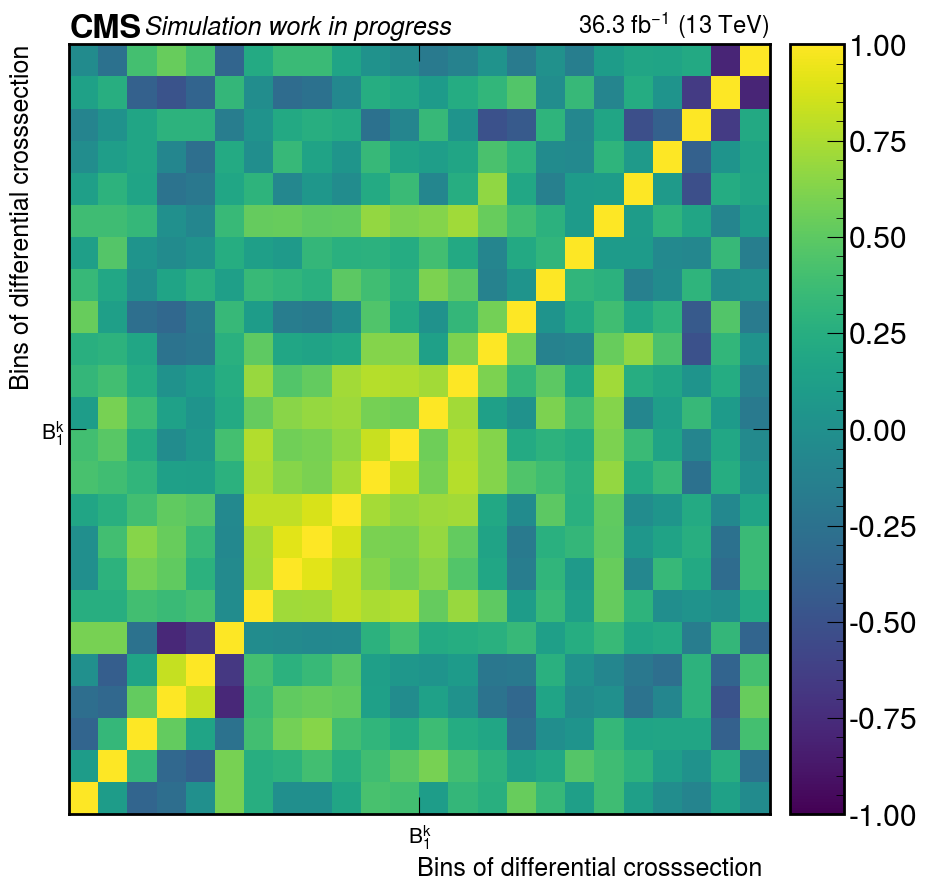

In [51]:
CovMatrix  = fileptr2D['TotalSystCovMatrix_AllVar_rebinnedA'].to_numpy()[0]

CorrMatrix = np.zeros((nbinsrhoi * nvars, nbinsrhoi * nvars)) 

for i in range(len(CovMatrix)) :
    for j in range(len(CovMatrix)) :
        CorrMatrix[i][j] = CovMatrix[i][j]/ math.sqrt(CovMatrix[i][i]* CovMatrix[j][j])
                
hep.hist2dplot(CorrMatrix[:nbinsrhoi, :nbinsrhoi], vmin=-1, vmax=1)
plt.ylabel('Bins of differential crosssection', fontsize=18)
plt.xlabel('Bins of differential crosssection ', fontsize=18)

plt.xticks([nbinsrhoi//2], [r'$B_{1}^{k}$'], rotation=0, fontsize=15)
plt.yticks([nbinsrhoi//2], [r'$B_{1}^{k}$'], rotation=0, fontsize=15)

hep.cms.label('work in progress', lumi=36.3, fontsize=18)
plt.savefig('Statistical_correlation_matrix_b1k_2D.pdf', bbox_inches='tight')